<a href="https://colab.research.google.com/github/kuberiitb/learnings/blob/master/pytorch/lecture_09_torch_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learnings from [Abhishek Thakur Pytoch Series](https://www.youtube.com/watch?v=_R-mvKBD5U8&list=PL98nY_tJQXZln8spB5uTZdKN08mYGkOf2&index=7)

In [2]:
import torch 

In [3]:
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Thu Feb  3 09:40:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [6]:
class CustomDataSet:
  def __init__(self, data, targets):
    self.data = data
    self.targets = targets

  def __len__(self):
    return self.data.shape[0]
  
  def __getitem__(self, idx):
    current_sample = self.data[idx]
    current_target = self.targets[idx]

    return {
        "x": torch.tensor(current_sample, dtype = torch.float), 
        "y": torch.tensor(current_target, dtype = torch.long),
    }

In [7]:
# default n_samples=100, n_features=20, n_classes=2
# returns x, y
data, targets = make_classification(n_samples=1000)

In [8]:
train_data, test_data, train_targets, test_targets =  train_test_split(data, targets, stratify=targets)

In [9]:
print(train_data.shape, 
      test_data.shape, 
      train_targets.shape, 
      test_targets.shape)

(750, 20) (250, 20) (750,) (250,)


In [10]:
train_dataset = CustomDataSet(data=train_data,  targets=train_targets)
test_dataset = CustomDataSet(data=test_data,  targets=test_targets)

In [11]:
len(train_dataset)

750

In [12]:
train_dataset[0]

{'x': tensor([ 0.4453, -1.3352, -0.1936,  0.3496,  1.1778, -0.7850,  0.2890, -1.8016,
         -2.4640,  0.8013, -0.3833,  0.6848, -2.2016, -1.4477,  0.6421, -0.3431,
         -1.9471,  0.9996,  0.0369, -0.4622]), 'y': tensor(0)}

In [16]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, num_workers=2)

## Build NN Model

In [76]:
import torch
import torch.nn as nn

## Containers 
* Module
* Sequential
* ModuelList
* ModuleDict

## Layers

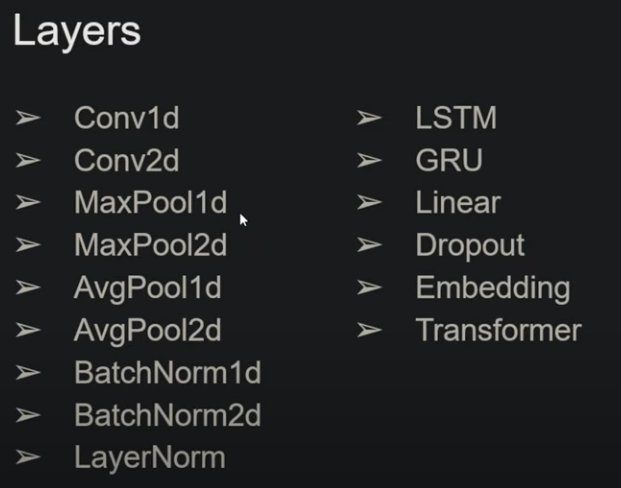

In [78]:
# input size: 128
# output size: 1 (linear regression)

class Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(128, 32)
    self.layer2 = nn.Linear(32, 16)
    self.layer3 = nn.Linear(16, 1)
    
  def forward(self, input):
    # input size: batch_size, n_features
    # (32, 128)
    x = self.layer1(input)
    print(x.shape) # (batch_size, 32)
    x = self.layer2(x)
    print(x.shape) # (batch_size, 16)
    x = self.layer3(x)
    print(x.shape) # (batch_size, 1)
    return x

In [79]:
model = Model()

In [81]:
input = torch.rand(2, 128) # batch_size = 2
model(input)

torch.Size([2, 32])
torch.Size([2, 16])
torch.Size([2, 1])


tensor([[-0.1443],
        [-0.0473]], grad_fn=<AddmmBackward0>)

# Using gpu

In [92]:
input.device

device(type='cpu')

In [93]:
input = input.to("cuda")
model = Model()
model = model.to("cuda")

In [94]:
input.device

device(type='cuda', index=0)

In [95]:
model(input)

torch.Size([2, 32])
torch.Size([2, 16])
torch.Size([2, 1])


tensor([[-0.0075],
        [-0.0592]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Same model using sequential

In [97]:
# input size: 128
# output size: 1 (linear regression)

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.base = nn.Sequential(
        nn.Linear(128, 32),
        nn.Linear(32, 16),
        nn.Linear(16, 1)
    )
    
  def forward(self, input):
    # input size: batch_size, n_features
    # (32, 128)
    x = self.base(input) # no need to call internal layers in the Sequential
    print(x.shape)
    return x

In [101]:

model = Model()

model.to("cuda")
input.to("cuda")

model(input)

torch.Size([2, 1])


tensor([[0.1603],
        [0.1725]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Activations 
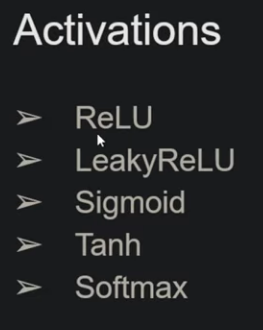

## Loss Functions

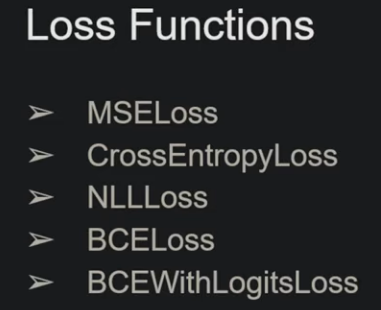


# Pytorch Series Finished. 
# Next step is [Build Your Own PyTorch Trainer](https://www.youtube.com/watch?v=8ua0qfbPnfk)
# And MadeWithML